# Introducción a Jupyter Notebook, Pandas, Matplotlib, etc.

En esta hoja introduciremos la forma de trabajar con Jupyter Notebook/Google Colab. Veremos cómo los distintos elementos de las librerías de Python interactúan con el notebook para mostrar imágenes, gráficos, etc. También, en las siguientes sesiones los usaremos para acceder a conexiones SQL y a bases de datos NoSQL.

Enlaces a otros tutoriales introductorios (que también se centran en tratamiento de datos para Big Data): [1](https://github.com/CharlestonDataScience/PythonNotebooks/blob/master/notebooks/tutorial_01/pandas_tutorial.ipynb) y [2](https://github.com/phelps-sg/python-bigdata/blob/master/src/main/ipynb/pandas.ipynb), entre otros muchos.

## Jupyter/Colab Notebook

Los *Notebooks* contienen una mezcla de texto y código, y se pueden ir ejecutando paso a paso. En general utilizaremos el lenguaje Python en su versión 3, así que las hojas son en realidad un programa Python que se puede ejecutar en orden, junto con imágenes y texto explicativo adjunto.

Al pulsar Ctrl+Intro en una celda, se ejecuta el código de la celda y se muestra el la siguiente celda. Al pulsar Shift+Intro se ejecuta la celda actual y pasa automáticamente a la siguiente.

Existen también "magics", que sirven para obtener información de la hoja, o ejecutar comandos especiales. Por ejemplo, órdenes de shell, como en la siguiente celda. Hay varios tutoriales Online. Por ejemplo: [Tutorial](https://github.com/esc/scipy2013-tutorial-numpy-ipython/blob/master/ipython.ipynb).

In [1]:
!uname -a

Linux e297bf3069c9 5.15.120+ #1 SMP Wed Aug 30 11:19:59 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

A continuación mostramos los paquetes que usaremos regularmente para tratar datos, `pandas`, `numpy`, `matplotlib`. Al ser un programa en Python, se pueden importar paquetes que seguirán siendo válidos hasta el final del _notebook_.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

Lo siguiente hace que los gráficos se muestren inline. Para figuras pequeñas se puede utilizar unas figuras interactivas que permiten zoom, usando `%maplotlib nbagg`.

In [4]:
%matplotlib inline
matplotlib.style.use('ggplot')

## Numpy

Numpy es una de las librerías más utilizadas en Python, y ofrece un interfaz sencillo para operaciones eficientes con números, _arrays_ y matrices. Numpy se utilizará de apoyo muchas veces que haya que hacer procesamiento local de datos recogidos de una base de datos, o como preparación para la graficación de datos. En la celda siguiente se muestra un vídeo introductorio, y también se puede acceder a tutoriales online: [Tutorial](https://github.com/esc/scipy2013-tutorial-numpy-ipython/blob/master/operations.ipynb).

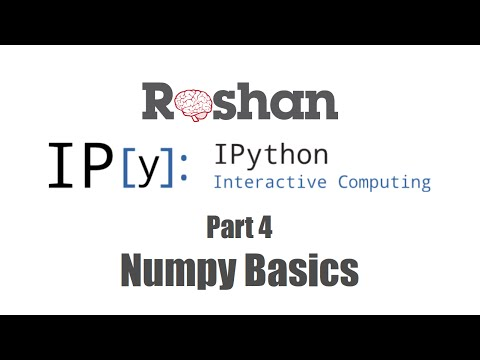

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('o8fmjaW9a0A') # Yes, it can also embed youtube videos.

Numpy permite generar y procesar arrays de datos de forma muy eficiente. A continuación se muestran algunos ejemplos:

In [6]:
a = np.array([4,5,6])
print(a.shape)
print(a[0])
a[0] = 9
print (a)

(3,)
4
[9 5 6]


In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.arange(1,20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

También arrays multidimensionales:

In [9]:
a = np.zeros((2,2))
print (a)

[[0. 0.]
 [0. 0.]]


In [10]:
a.ndim

2

In [11]:
a.dtype

dtype('float64')

In [12]:
b = np.random.random((2,2))
print (b)

[[0.51352316 0.24275017]
 [0.43322347 0.17293105]]


In [13]:
a = np.random.random((2,2))
print(a)

[[0.71898263 0.08728741]
 [0.26000206 0.88472543]]


Se pueden aplicar funciones sobre todo el array o matriz, y el resultado será una matriz idéntica con el operador aplicado. Similar a lo que ocurre con la operación `map` de algunos lenguajes de programación (incluído Python):

In [14]:
print (a >= .5)

[[ True False]
 [False  True]]


También se pueden _filtrar_ los elementos de un array o matriz que cumplan una condición. Para eso se utiliza el operador de indización (`[]`) con una expresión booleana.

In [15]:
print (a[a >= .5])

[0.71898263 0.88472543]


¿Por qué usar Numpy?

`%%capture` captura la salida de la ejecución de la celda en la variable dada como parámetro. Después se puede imprimir.

`%timeit` se utiliza para ejecutar varias veces una instrucción y calcular un promedio de su duración.

In [16]:
%%capture timeit_output

%timeit l1 = range(1,1000)

%timeit l2 = np.arange(1,1000)

In [17]:
print(timeit_output)

213 ns +- 39.8 ns per loop (mean +- std. dev. of 7 runs, 10000000 loops each)
1.46 us +- 460 ns per loop (mean +- std. dev. of 7 runs, 1000000 loops each)



In [18]:
x = np.array([[1,2],[3,4]])

print (np.sum(x))  # Compute sum of all elements; prints "10"
print (np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print (np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


In [19]:
x * 2

array([[2, 4],
       [6, 8]])

In [20]:
x ** 2

array([[ 1,  4],
       [ 9, 16]])

`numpy` tiene infinidad de funciones, por lo que sería interesante darse una vuelta por su documentación: https://docs.scipy.org/doc/.

## Matplotlib

Matplotlib permite generar gráficos de forma sencilla. Lo veremos aquí primero conectado sólo con `Numpy` y después conectado con `Pandas`.

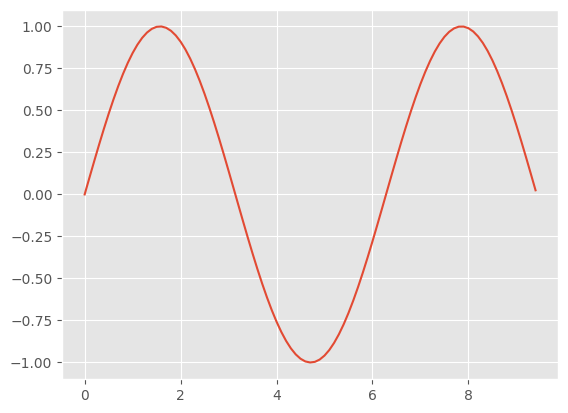

In [21]:
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)
plt.subplot()
# Plot the points using matplotlib
plt.plot(x, y)
plt.show()

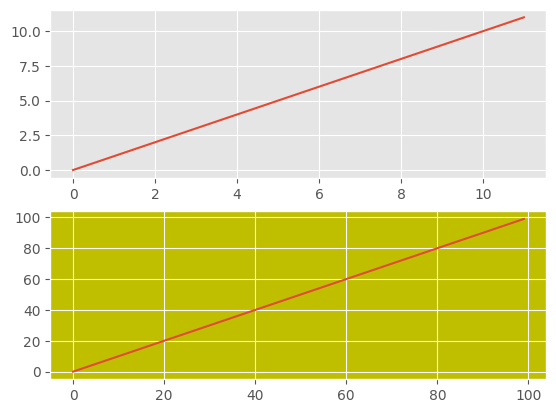

In [22]:
plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, facecolor='y')
plt.plot(range(100))
plt.show()

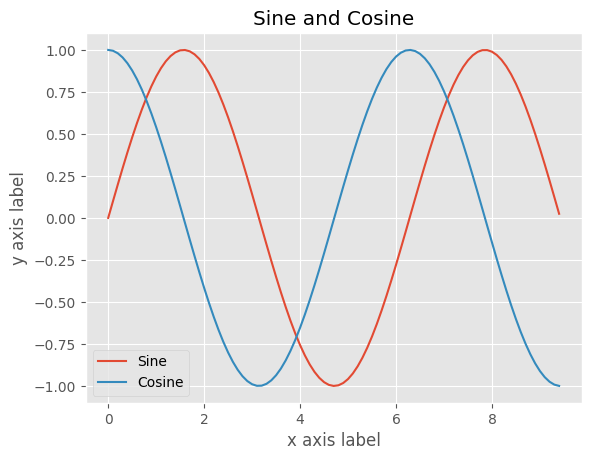

In [23]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

## Pandas

Tutoriales: [1](https://pandas.pydata.org/docs/user_guide/index.html), [2](https://dev.socrata.com/blog/2016/02/01/pandas-and-jupyter-notebook.html), [3](http://nikgrozev.com/2015/12/27/pandas-in-jupyter-quickstart-and-useful-snippets/).

Pandas permite gestionar conjuntos de datos n-dimensionales de diferentes formas, y también conectarlo con matplotlib para hacer gráficas.

Los conceptos principales de Pandas son los `Dataframes` y las `Series`. La diferencia entre ambas es que la serie guarda sólo una serie (una columna o una fila, depende de como se quiera interpretar), mientras que un Dataframe guarda estructuras multidimensaionales agregando series.

Ambas tienen una (o varias) "columna fantasma", que sirve de índice, y que se puede acceder con `d.index` (tanto si `d` es una serie o un dataframe). Si no se especifica un índice, se le añade uno virtual numerando las filas desde cero. Además, los índices pueden ser multidimensionales (por ejemplo, tener un índice por mes y dentro uno por dia de la semana).

In [24]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01    0.908004
2000-01-02    0.854416
2000-01-03    0.472175
2000-01-04    0.421149
2000-01-05    1.611896
                ...   
2002-09-22    0.944799
2002-09-23    0.516824
2002-09-24   -0.689943
2002-09-25   -0.281201
2002-09-26   -0.050022
Freq: D, Length: 1000, dtype: float64

In [25]:
ts.describe()

count    1000.000000
mean        0.011976
std         1.035080
min        -3.095472
25%        -0.702541
50%         0.021589
75%         0.740575
max         3.294474
dtype: float64

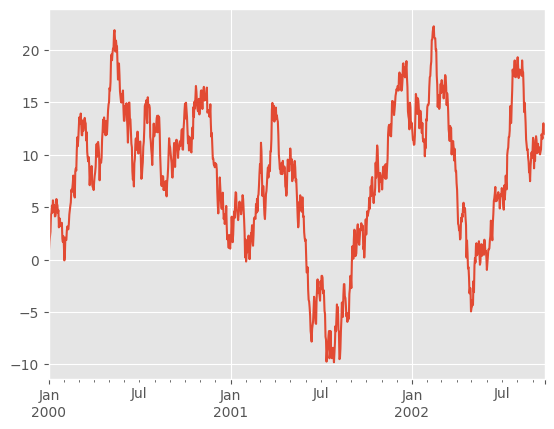

In [26]:
ts = ts.cumsum()
ts.plot();

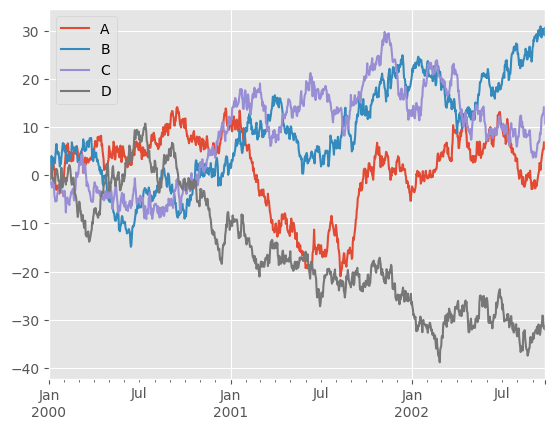

In [27]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()

df.plot();

Se puede hacer plot también de una columna contra otra.

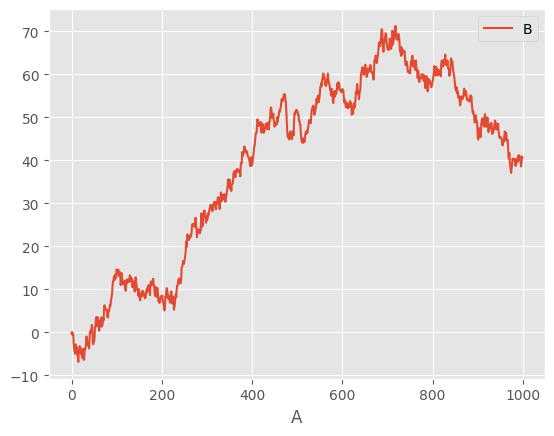

In [28]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df3))))
df3.plot(x='A', y='B');

Valores incompletos. Si no se establecen, se pone a `NaN` (_not a number_).

In [29]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


`fillna()` permite cambiar el valor de los datos faltantes.

In [ ]:
df.fillna(0)

In [ ]:
pd.DataFrame(d, index=['d', 'b', 'a'])

In [ ]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

A continuación se muestra un ejemplo de uso de Pandas para leer datos y procesarlos en un Dataframe.

El primer ejemplo completo carga desde el fichero `swift-question-dates.txt.gz` las fechas de las preguntas en Stackoverflow que contienen el tag "swift".

La función `read_csv` es capaz de leer cualquier fichero CSV y lo convierte en un "Dataframe", una estructura de tabla que guarda también los nombres y los tipos de las columnas, así como un índice por el que se identificarán las tablas. La lista incluye la fecha en donde se produjo una pregunta con el tag "swift". Como los datos en sí son las fechas, hacemos que la columna de fechas haga a su vez de índice.

In [30]:
df = pd.read_csv('https://github.com/dsevilla/bdge/raw/master/intro/swift-question-dates.txt.gz',
                 header=None,
                 names=['date'],
                 compression='gzip',
                 parse_dates=['date'],
                 index_col='date')

In [31]:
df

""
date
2008-08-24
2008-11-19
2009-02-17
2009-03-30
2009-04-07
...
2016-09-04
2016-09-04
2016-09-04


No charts were generated by quickchart


De la fecha, extraer sólo la fecha (no la hora, que no nos interesa).

In [32]:
df.index = df.index.date

Añadimos una columna de todo "1" para especificar que cada pregunta cuenta como 1.

In [33]:
df['Count'] = 1
df

,Count
2008-08-24,1
2008-11-19,1
2009-02-17,1
2009-03-30,1
2009-04-07,1
...,...
2016-09-04,1
2016-09-04,1
2016-09-04,1
2016-09-04,1


A los Dataframe de Pandas también se les puede aplicar operaciones de agregación, como `groupby` o `sum`. Finalmente, la funcion `plot()` permite mostrar los datos en un gráfico.

In [34]:
accum = df.groupby(df.index).sum()
accum

,Count
2008-08-24,1
2008-11-19,1
2009-02-17,1
2009-03-30,1
2009-04-07,1
...,...
2016-08-31,231
2016-09-01,231
2016-09-02,197
2016-09-03,158


In [35]:
# Los 30 primeros registros que tengan un número de preguntas mayor que 20 por día.
accum = accum[accum.Count > 20][:30]
accum

,Count
2014-06-02,33
2014-06-03,170
2014-06-04,188
2014-06-05,160
2014-06-06,139
2014-06-07,84
2014-06-08,148
2014-06-09,123
2014-06-10,140
2014-06-11,103


<Axes: >

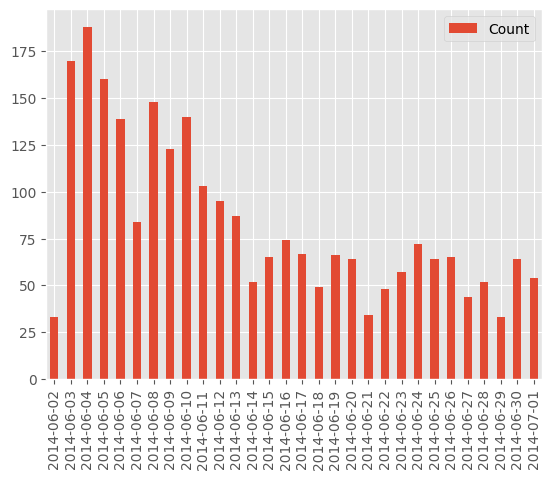

In [36]:
accum[accum.Count > 30][:30].plot.bar()

A continuación comprobamos con la página de la Wikipedia cuándo apareció el lenguaje Swift:

In [37]:
!pip install lxml

In [38]:
dfwiki = pd.read_html('https://en.wikipedia.org/wiki/Swift_(programming_language)',attrs={'class': 'infobox vevent'})

In [39]:
dfwiki[0]

,0,1
0,Logo,Logo
1,NaN,NaN
2,Paradigm,"Multi-paradigm: protocol-oriented, object-orie..."
3,Designed by,"Chris Lattner, Doug Gregor, John McCall, Ted K..."
4,Developer,Apple Inc. and open-source contributors
5,First appeared,"June 2, 2014; 9 years ago[2]"
6,NaN,NaN
7,Stable release,5.9[3] / 18 September 2023; 9 days ago
8,Preview release,5.9
9,Typing discipline,"Static, strong, inferred"


In [40]:
firstdate = dfwiki[0][1][5]
firstdate

'June\xa02, 2014; 9 years ago[2]'

In [41]:
from dateutil.parser import parse
dt = parse(firstdate.split(';')[0])
print (dt.date().isoformat())
print (accum.index[0].isoformat())

assert dt.date().isoformat() == accum.index[0].isoformat()

2014-06-02
2014-06-02


A continuación se muestra cómo ubicar posiciones en un mapa con el paquete `folium`. Se muestra también cómo acceder a distintas posiciones del Dataframe con `iloc`, `loc`, etc.

In [42]:
# cargar municipios y mostrarlos en el mapa
df = pd.read_csv('https://github.com/dsevilla/bdge/raw/master/intro/municipios-2017.csv.gz',header=0,compression='gzip')

In [43]:
df.head()

,COD_INE,ID_REL,COD_GEO,COD_PROV,PROVINCIA,NOMBRE_ACTUAL,POBLACION_MUNI,SUPERFICIE,PERIMETRO,COD_INE_CAPITAL,CAPITAL,POBLACION_CAPITAL,HOJA_MTN25_ETRS89,LONGITUD_ETRS89,LATITUD_ETRS89,ORIGENCOOR,ALTITUD,ORIGENALTITUD
0,1001000000,1010014,1010,1,Araba/Álava,Alegría-Dulantzi,2856,1.994587e+03,35069,1001000101,Alegría-Dulantzi,2747,0113-3,-2.712437,42.939812,Mapa,600.0,MDT5
1,1002000000,1010029,1020,1,Araba/Álava,Amurrio,10260,9.635289e+06,65134,1002000201,Amurrio,9124,0086-4,-3.000073,43.054278,Mapa,219.0,MDT5
2,1003000000,1010035,1030,1,Araba/Álava,Aramaio,1502,7.327403e+03,41818,1003000601,Ibarra,803,0087-4,-2.565400,43.051197,Mapa,333.0,MDT5
3,1004000000,1010040,1040,1,Araba/Álava,Artziniega,1840,2.728730e+03,22886,1004000101,Artziniega,1704,0086-1,-3.127917,43.120844,Mapa,210.0,MDT5
4,1006000000,1010066,1060,1,Araba/Álava,Armiñón,234,1.294433e+03,24606,1006000101,Armiñón,111,0137-4,-2.871835,42.723262,Mapa,467.0,MDT5


In [44]:
df.iloc[0]

COD_INE                    1001000000
ID_REL                        1010014
COD_GEO                          1010
COD_PROV                            1
PROVINCIA                 Araba/Álava
NOMBRE_ACTUAL        Alegría-Dulantzi
POBLACION_MUNI                   2856
SUPERFICIE                  1994.5872
PERIMETRO                       35069
COD_INE_CAPITAL            1001000101
CAPITAL              Alegría-Dulantzi
POBLACION_CAPITAL                2747
HOJA_MTN25_ETRS89              0113-3
LONGITUD_ETRS89             -2.712437
LATITUD_ETRS89              42.939812
ORIGENCOOR                       Mapa
ALTITUD                         600.0
ORIGENALTITUD                    MDT5
Name: 0, dtype: object

In [45]:
df.iloc[0].NOMBRE_ACTUAL

'Alegría-Dulantzi'

In [46]:
df.loc[:,'NOMBRE_ACTUAL']

0            Alegría-Dulantzi
1                     Amurrio
2                     Aramaio
3                  Artziniega
4                     Armiñón
                ...          
8119                     Biel
8120                 Marracos
8121    Villamayor de Gállego
8122                    Ceuta
8123                  Melilla
Name: NOMBRE_ACTUAL, Length: 8124, dtype: object

In [47]:
df.iloc[:,0]

0        1001000000
1        1002000000
2        1003000000
3        1004000000
4        1006000000
           ...     
8119    50901000000
8120    50902000000
8121    50903000000
8122    51001000000
8123    52001000000
Name: COD_INE, Length: 8124, dtype: int64

In [48]:
df.PROVINCIA

0       Araba/Álava
1       Araba/Álava
2       Araba/Álava
3       Araba/Álava
4       Araba/Álava
           ...     
8119       Zaragoza
8120       Zaragoza
8121       Zaragoza
8122          Ceuta
8123        Melilla
Name: PROVINCIA, Length: 8124, dtype: object

In [49]:
df[df.PROVINCIA == 'A Coruña']

,COD_INE,ID_REL,COD_GEO,COD_PROV,PROVINCIA,NOMBRE_ACTUAL,POBLACION_MUNI,SUPERFICIE,PERIMETRO,COD_INE_CAPITAL,CAPITAL,POBLACION_CAPITAL,HOJA_MTN25_ETRS89,LONGITUD_ETRS89,LATITUD_ETRS89,ORIGENCOOR,ALTITUD,ORIGENALTITUD
2123,15001000000,1150011,15010,15,A Coruña,Abegondo,5533,8.389634e+03,59995,15001011501,San Marco,185,0045-4,-8.288772,43.227281,GPS. PNRGM,144.0,GPS. PNRGM
2124,15002000000,1150026,15020,15,A Coruña,Ames,30544,8.004346e+03,71365,15002080101,Bertamiráns,8309,0094-4,-8.650329,42.859455,GPS. PNRGM,33.0,GPS. PNRGM
2125,15003000000,1150032,15030,15,A Coruña,Aranga,1982,1.195902e+07,60971,15003012301,Ponte Aranga,8,0046-4,-8.016029,43.234040,GPS. PNRGM,269.0,GPS. PNRGM
2126,15004000000,1150047,15040,15,A Coruña,Ares,5672,1.830962e+03,35274,15004010101,Ares,3855,0021-2,-8.243660,43.426559,GPS. PNRGM,7.0,GPS. PNRGM
2127,15005000000,1150050,15050,15,A Coruña,Arteixo,31239,9.367961e+06,59897,15005020101,A Baiuca,12021,0045-1,-8.505070,43.304745,GPS. PNRGM,31.0,GPS. PNRGM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,15091000000,1150912,15900,15,A Coruña,Vilarmaior,1260,3.034701e+03,37004,15091060201,A Armada,20,0022-3,-8.130038,43.354769,GPS. PNRGM,275.0,GPS. PNRGM
2212,15092000000,1150927,15910,15,A Coruña,Vimianzo,7378,1.872679e+04,75028,15092141001,Vimianzo,1461,0068-1,-9.034414,43.110254,GPS. PNRGM,132.0,GPS. PNRGM
2213,15093000000,1150933,15920,15,A Coruña,Zas,4756,1.332853e+04,79109,15093160301,Zas,393,0068-2,-8.916118,43.099720,GPS. PNRGM,229.0,GPS. PNRGM
2214,15901000000,1159012,15195,15,A Coruña,Cariño,4072,4.719000e+03,46823,15901010101,Cariño,2824,0001-4,-7.868425,43.740351,GPS. PNRGM,7.0,GPS. PNRGM


In [50]:
mula = df[df.NOMBRE_ACTUAL == 'Mula'].iloc[0]
mula

COD_INE              30029000000
ID_REL                   1300294
COD_GEO                    30290
COD_PROV                      30
PROVINCIA                 Murcia
NOMBRE_ACTUAL               Mula
POBLACION_MUNI             16689
SUPERFICIE            63405.9253
PERIMETRO                 150394
COD_INE_CAPITAL      30029000901
CAPITAL                     Mula
POBLACION_CAPITAL          14380
HOJA_MTN25_ETRS89         0912-3
LONGITUD_ETRS89        -1.490328
LATITUD_ETRS89         38.042033
ORIGENCOOR                  Mapa
ALTITUD                    318.0
ORIGENALTITUD               MDT5
Name: 4594, dtype: object

In [51]:
(mula_lat,mula_lon) = (mula.LATITUD_ETRS89, mula.LONGITUD_ETRS89)
(mula_lat,mula_lon)

(38.04203339, -1.49032811)

El paquete `folium` permite generar mapas de posiciones. El siguiente ejemplo centra un mapa en Mula y pone un marcador con su nombre:

In [52]:
!pip install folium

In [53]:
import folium

map = folium.Map(location=[mula_lat, mula_lon],zoom_start=10)
folium.Marker(location = [mula_lat, mula_lon], popup="{} ({} habitantes)".format(mula.NOMBRE_ACTUAL,mula.POBLACION_MUNI)).add_to(map)

map

## Ejercicio

Mostrar con `folium` marcadores para cada pueblo de Murcia. Se pueden usar las funciones `itertuples()` o `iterrows()` de un `Dataframe` para recorrer los elementos del mismo.

In [62]:
#Inicializamos mapa
map = folium.Map(location=[mula_lat, mula_lon],zoom_start=10)

#Sacamos pueblos de Murcia
pueblos = df[df.PROVINCIA=="Murcia"]

#Añadimos coordenadas al mapa
for pueblo in pueblos.itertuples():
  (lat,lon) = (pueblo.LATITUD_ETRS89, pueblo.LONGITUD_ETRS89)
  folium.Marker(location = [lat, lon], popup="{} ({} habitantes)".format(pueblo.NOMBRE_ACTUAL,pueblo.POBLACION_MUNI)).add_to(map)

map